<a href="https://colab.research.google.com/github/singhamritanshu/machine_learning_algorithms_cse574/blob/main/adaboost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

x_train = x_train/255
x_test = x_test/255

In [4]:
cv = ShuffleSplit(n_splits =10, test_size = 0.2, random_state=42)

In [5]:
def train_classifier(estimator, x_train, y_train, cv, name):
  estimator.fit(x_train,y_train)
  cv_train_score = cross_val_score(estimator, x_train, y_train,cv=cv, scoring='f1_macro')
  print(f"On an average, {name} model has f1 score of "f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training data")

In [10]:
def eval(estimator, x_test, y_test):
  y_pred = estimator.predict(x_test)
  print("# Classification report")
  print(classification_report(y_test, y_pred))
  print("# Confusion Matrix")
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.show()

In [11]:
abc_pipeline =Pipeline([("classifier", AdaBoostClassifier())])
train_classifier(abc_pipeline, x_train, y_train.ravel(), cv, AdaBoostClassifier)

On an average, <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> model has f1 score of 0.712 +/- 0.016 on the training data


# Classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion Matrix


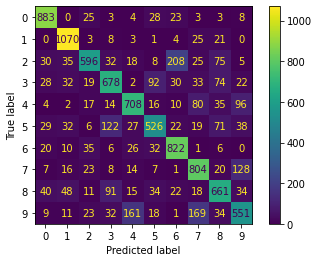

In [12]:
eval(abc_pipeline, x_test, y_test)